In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy,binary_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import shutil
import random
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from tensorflow.keras.callbacks import EarlyStopping
from  tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions 
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import os
from keras import layers
from keras.applications import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [3]:
%cd "D:\Final"

D:\Final


In [5]:
if os.path.isdir("train/with_mask") is False:
    os.makedirs("train/with_mask")
    os.makedirs("train/without_mask")
    os.makedirs("test/with_mask")
    os.makedirs("test/without_mask")
    os.makedirs("valid/with_mask")
    os.makedirs("valid/without_mask")

    for c in random.sample(glob.glob("D:\Final\with_mask\*.jpg"),1500):
        shutil.move(c,'train/with_mask')


    for c in random.sample(glob.glob("D:\Final\without_mask\*.jpg"),1500):
        shutil.move(c,'train/without_mask')

    for c in random.sample(glob.glob("D:\Final\with_mask\*.jpg"),500):
        shutil.move(c,'test/with_mask')

    for c in random.sample(glob.glob("D:\Final\without_mask\*.jpg"),500):
        shutil.move(c,'test/without_mask')
        
    for c in random.sample(glob.glob("D:\Final\with_mask\*.jpg"),300):
        shutil.move(c,'valid/with_mask')
        
    for c in random.sample(glob.glob("D:\Final\without_mask\*.jpg"),300):
        shutil.move(c,'valid/without_mask')

In [8]:
train_path = r"D:\Final\train"
test_path = r"D:\Final\test"
valid_path =r"D:\Final\valid"

In [9]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

img_size = (128, 128)

train_ds = train_gen.flow_from_directory(train_path, target_size=img_size)
test_ds = test_gen.flow_from_directory(test_path, target_size=img_size)
val_ds = val_gen.flow_from_directory(valid_path, target_size=img_size)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [16]:
img,labels= next(train_ds)

In [17]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

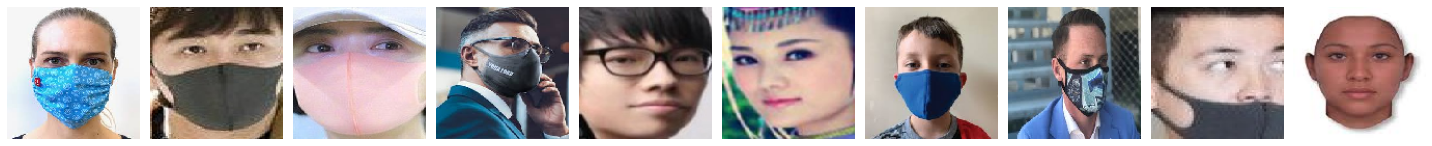

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [18]:
plotImages(img)
print(labels)

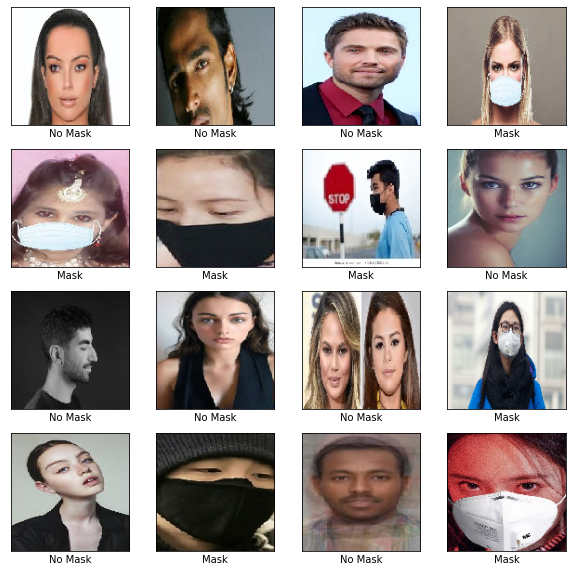

In [10]:
images, labels = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('No Mask' if labels[i][1] else 'Mask')

In [30]:
base_model = VGG19(include_top = False, input_shape = img_size+(3,))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(2, activation = 'sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 16386     
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [32]:
history = model.fit(train_ds, batch_size = 32, epochs = 10, validation_data = val_ds)
model.save('VGG19-Face Mask Detection1.h5')
model.evaluate(test_ds)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.5685 - binary_accuracy: 0.7079

c:\program files\python37\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


32/32 [==============================] - 159s 5s/step - loss: 0.5643 - binary_accuracy: 0.7109 - val_loss: 0.2668 - val_binary_accuracy: 0.9017
Epoch 2/10
32/32 [==============================] - 155s 5s/step - loss: 0.2109 - binary_accuracy: 0.9286 - val_loss: 0.1995 - val_binary_accuracy: 0.9183
Epoch 3/10
32/32 [==============================] - 142s 4s/step - loss: 0.1423 - binary_accuracy: 0.9569 - val_loss: 0.1724 - val_binary_accuracy: 0.9317
Epoch 4/10
32/32 [==============================] - 143s 4s/step - loss: 0.1056 - binary_accuracy: 0.9853 - val_loss: 0.1611 - val_binary_accuracy: 0.9433
Epoch 5/10
32/32 [==============================] - 144s 5s/step - loss: 0.0878 - binary_accuracy: 0.9849 - val_loss: 0.1509 - val_binary_accuracy: 0.9450
Epoch 6/10
32/32 [==============================] - 150s 5s/step - loss: 0.0693 - binary_accuracy: 0.9921 - val_loss: 0.1433 - val_binary_accuracy: 0.9467
Epoch 7/10
32/32 [==============================] - 150s 5s/step - loss: 0.0612 -

[0.13274100422859192, 0.9387500286102295]

In [35]:
model.evaluate(test_ds)


13/13 [==============================] - 44s 3s/step - loss: 0.1327 - binary_accuracy: 0.9388


[0.13274097442626953, 0.9387500286102295]

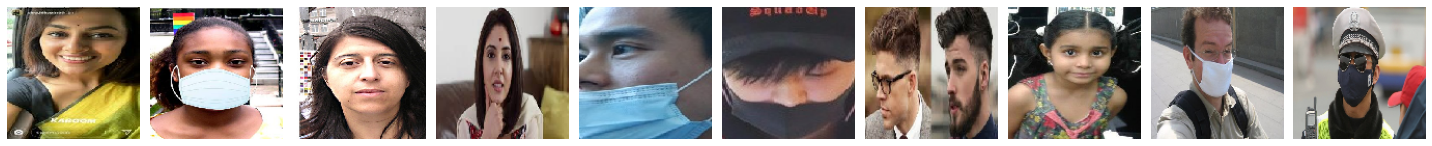

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [36]:
test_img,test_labels = next(test_ds)
plotImages(test_img)
print(test_labels)

In [42]:
test_ds.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
predictions = model.predict(x=test_ds,verbose=2)

13/13 - 32s


In [51]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.

In [53]:
confusion_matrix(y_true=test_ds.classes,y_pred=np.argmax(predictions,axis=-1))

array([[101,  99],
       [ 92, 108]], dtype=int64)

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score
       

In [57]:
accuracy_score(test_ds.classes,np.argmax(predictions,axis=-1))

0.5225

In [46]:
cm = confusion_matrix(y_true=test_ds.classes,y_pred=np.argmax(predictions,axis=-1))

In [48]:
test_ds.class_indices

{'with_mask': 0, 'without_mask': 1}